In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv("../data/census.csv")
data.head()

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [63]:
data.drop('education', axis=1, inplace=True)

In [64]:
data.isna().sum()

age               0
workclass         0
fnlgt             0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [65]:
data.isin(['?']).sum()

age                  0
workclass         1836
fnlgt                0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [66]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [67]:
countries = data['native-country'].unique()
print('Unique countries', len(countries)) # 42 Countries
marital_status_cats = data['marital-status'].unique()
print('Unique marital status', len(marital_status_cats)) # 7 Marital Status
occupations = data['occupation'].unique()
print('Unique occupations', len(occupations)) # 15 Occupations

Unique countries 42
Unique marital status 7
Unique occupations 15


In [68]:
data = data.replace('?', np.NaN)
data.isna().sum()

age                  0
workclass         1836
fnlgt                0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [69]:
data.dropna(inplace=True)
data

,age,workclass,fnlgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [70]:
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [71]:
def get_uniques(df, columns):
    uniques = dict()
    for column in columns:
        uniques[column] = list(df[column].unique())
    return uniques

In [72]:
uniques = get_uniques(data, categorical_features)

acc = 0
for key, value in uniques.items():
    acc += len(value)
    print(key, len(value))

print('Number of categorical features', acc)

workclass 7
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41
Number of categorical features 82


In [73]:
binary_features = ['sex']
nominal_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

In [74]:
def binary_encode(df, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        df[column] = label_encoder.fit_transform(df[column])
    return df

def onehot_encode(df, columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

In [75]:
data = binary_encode(data, binary_features)
data = onehot_encode(data, nominal_features)

In [76]:
(data.dtypes == 'object').sum()

1

In [77]:
data

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,salary,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,1,2174,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,1,0,0,20,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
y = data['salary']
X = data.drop('salary', axis=1)

In [79]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
y_mappings


{0: '<=50K', 1: '>50K'}

In [80]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [81]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [87]:
X

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.301370,0.043338,0.800000,1.0,0.021740,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.047277,0.800000,1.0,0.000000,0.0,0.122449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.137244,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.150212,0.400000,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.220703,0.800000,0.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.165563,0.733333,0.0,0.000000,0.0,0.377551,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30158,0.315068,0.095589,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30159,0.561644,0.093914,0.533333,0.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30160,0.068493,0.127620,0.533333,1.0,0.000000,0.0,0.193878,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Training

In [88]:
import tensorflow as tf

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [91]:
X_train

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
23028,0.082192,0.026376,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18129,0.465753,0.005739,0.866667,1.0,0.0,0.436639,0.602041,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23147,0.452055,0.181183,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1867,0.246575,0.095613,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19421,0.438356,0.016033,0.866667,1.0,0.0,0.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,0.328767,0.005732,0.800000,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12166,0.438356,0.077054,0.533333,1.0,0.0,0.000000,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25030,0.602740,0.048145,0.666667,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9350,0.383562,0.125696,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
X_train

,age,fnlgt,education-num,sex,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
23028,0.082192,0.026376,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18129,0.465753,0.005739,0.866667,1.0,0.0,0.436639,0.602041,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23147,0.452055,0.181183,0.533333,0.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1867,0.246575,0.095613,0.533333,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19421,0.438356,0.016033,0.866667,1.0,0.0,0.000000,0.397959,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20543,0.328767,0.005732,0.800000,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12166,0.438356,0.077054,0.533333,1.0,0.0,0.000000,0.500000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25030,0.602740,0.048145,0.666667,1.0,0.0,0.000000,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9350,0.383562,0.125696,0.600000,1.0,0.0,0.000000,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [93]:
inputs = tf.keras.Input(shape=(87,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics = [
    tf.keras.metrics.BinaryAccuracy(name='acc'),
    tf.keras.metrics.AUC(name='auc')
]

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=metrics
)


batch_size = 32
epochs = 26

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Epoch 1/26
604/604 [==============================] - 1s 2ms/step - loss: 0.4199 - acc: 0.8005 - auc: 0.8249 - val_loss: 0.3756 - val_acc: 0.8247 - val_auc: 0.8837
Epoch 2/26
604/604 [==============================] - 1s 1ms/step - loss: 0.3546 - acc: 0.8323 - auc: 0.8850 - val_loss: 0.3507 - val_acc: 0.8330 - val_auc: 0.8950
Epoch 3/26
604/604 [==============================] - 1s 1ms/step - loss: 0.3403 - acc: 0.8407 - auc: 0.8949 - val_loss: 0.3454 - val_acc: 0.8382 - val_auc: 0.9010
Epoch 4/26
604/604 [==============================] - 1s 1ms/step - loss: 0.3318 - acc: 0.8440 - auc: 0.9002 - val_loss: 0.3349 - val_acc: 0.8438 - val_auc: 0.9057
Epoch 5/26
604/604 [==============================] - 1s 1ms/step - loss: 0.3256 - acc: 0.8473 - auc: 0.9042 - val_loss: 0.3288 - val_acc: 0.8502 - val_auc: 0.9076
Epoch 6/26
604/604 [==============================] - 1s 1ms/step - loss: 0.3226 - acc: 0.8516 - auc: 0.9061 - val_loss: 0.3218 - val_acc: 0.8539 - val_auc: 0.9088
Epoch 7/26
604/6

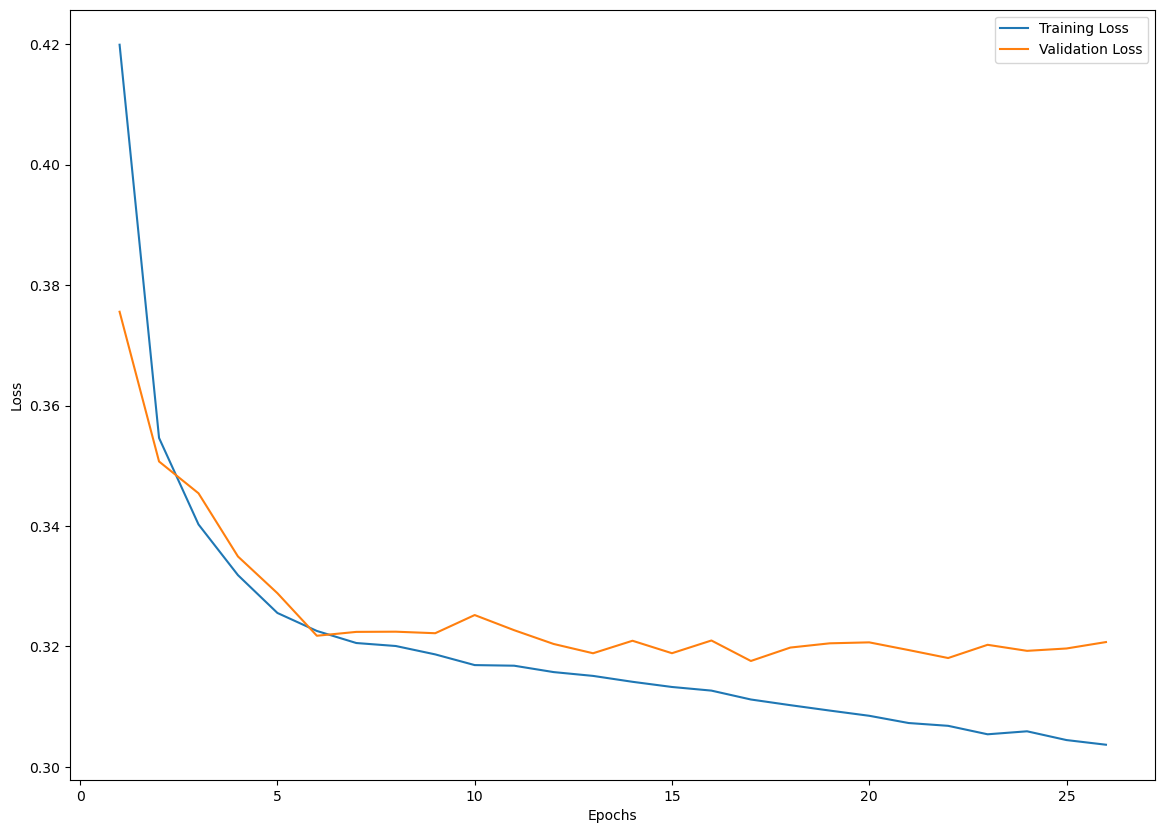

In [94]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [95]:
np.argmin(val_loss)

16

In [96]:
model.evaluate(X_test, y_test)

189/189 [==============================] - 0s 652us/step - loss: 0.3349 - acc: 0.8424 - auc: 0.9043


[0.3349294364452362, 0.8423669934272766, 0.9042742252349854]

In [97]:
y.sum() / len(y)

0.24892248524633645

In [105]:
model.predict(X_test[0:1])

1/1 [==============================] - 0s 102ms/step


array([[0.04120688]], dtype=float32)